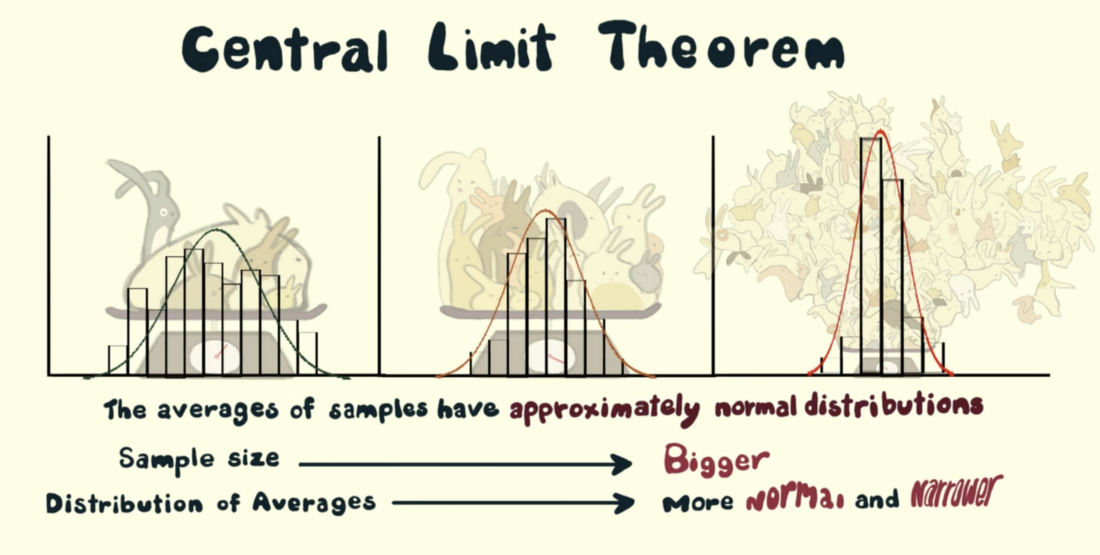

In [1]:
import numpy as np
import seaborn as sns
import statistics as stat
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import chi
from scipy.stats import t
from scipy.stats import shapiro 
from scipy.stats import kstest 
%pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats as st


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=463a8a6f750c3d6beec216fc277087cbc1f14180c60b0f4219360c5a8542443c
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


## 1 - Popluation is normal (Sigma_Population = known)

In [2]:
# Normal Population Generation

x = np.random.normal(4,1,size=10000) # at default parameters, will be "standard" normal distribution


In [ ]:
# Plot the Population

sns.distplot(x) 


In [7]:
# Get one random sample from population

x_sample = np.random.choice(x, size=10, replace=False)
print(x_sample)


[2.95525052 3.23391971 4.62967288 3.35677999 4.97127601 3.2250331
 2.43573468 3.89813113 3.05873479 3.84949809]


In [8]:
# Mean and Std of the random sample

print(np.mean(x_sample))
print(np.std(x_sample))


3.5614030896993163
0.7399197910984142


In [9]:
# Get multiple random samples and calculate mean

def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    z = sample_means.append(sample_mean)
  return sample_means


In [ ]:
# Plot the sample mean

# _ = sns.distplot(sample_mean_calculator(x, 10, 10))
# _ = sns.distplot(sample_mean_calculator(x, 10, 1000))
# _ = sns.distplot(sample_mean_calculator(x, 30, 1000))
# sns.distplot(x) 



In [ ]:
# Check mean_samlpe = mean_Population and sigma_sample = sigma_population / square root (n)

print(np.mean(sample_mean_calculator(x, 30, 1000)))
print(np.std(sample_mean_calculator(x, 30, 1000)))

In [ ]:
# Check the normality

shapiro(sample_mean_calculator(x, 30, 1000))

In [ ]:
# Fit distribution to sample mean

f = Fitter(sample_mean_calculator(x, 30, 1000),
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [21]:
# Probability calc using sample mean dist

# mean number of accidents of taxis less than 3.8
st.norm.cdf(3.8,loc=4,scale=.18)

0.1332602629025052

## 2 - Popluation is not normal (Sigma_Population = known)

In [ ]:
# Skewed Population Generation

s = skewnorm.rvs(12, size=10000)
sns.distplot(s)
print(np.mean(s))
print(np.std(s))

In [ ]:
# Plot the sample mean

_ = sns.distplot(sample_mean_calculator(s, 10, 1000))
_ = sns.distplot(sample_mean_calculator(s, 30, 1000))
shapiro(sample_mean_calculator(s, 30, 1000))


In [ ]:
# Multimodal Population Generation

m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))
_ = sns.distplot(m)
print(np.mean(m))
print(np.std(m))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9987464547157288, pvalue=0.7196613550186157)

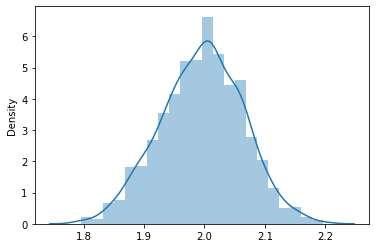

In [28]:
# Plot the sample mean

_ = sns.distplot(sample_mean_calculator(m, 30, 1000))
shapiro(sample_mean_calculator(m, 30, 1000))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.5044647551937451
0.29030747985563976


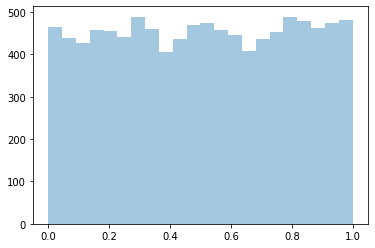

In [29]:
# Uniform Population Generation

u = np.random.uniform(size=10000)
_ = sns.distplot(u, kde=False)
print(np.mean(u))
print(np.std(u))

ShapiroResult(statistic=0.998413622379303, pvalue=0.4994968771934509)

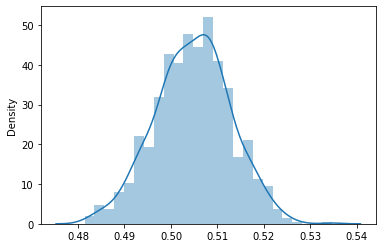

In [30]:
# Plot the sample mean

_ = sns.distplot(sample_mean_calculator(u, 30, 1000))
shapiro(sample_mean_calculator(x, 30, 1000))


In [31]:
# Probability calc using sample mean dist

# CDF or area under the curve of Uniform dist
st.norm.cdf(.6,loc=0.5,scale=0.288/30**0.5)

0.9714022908186987

## 3 - Population is normal (Sigma_Population = Unknown) 

In [35]:
# T ratio follows t dist but if n>30 according to CLT T ratio follows Normal dist

print(st.t.cdf(0.6,3, loc=0.5,scale=0.288/30**0.5))
print(st.norm.cdf(0.6, loc=0.5,scale=0.288/30**0.5))

0.9233214579382484
0.9714022908186987


# 4 - Sample Proportion

0.6


0.1317762386414864

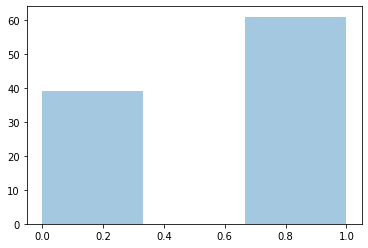

In [65]:
y = np.random.binomial(n=1,size=100,p=0.6)
sns.distplot(y,kde=False) 
# _ = sns.distplot(sample_mean_calculator(y, 1, 10))
print(np.mean(sample_mean_calculator(y, 1, 10)))

st.norm.cdf(.5,loc=.6,scale=(0.6*0.4/30)**0.5)

# 5 - Sample variance

In [66]:
# CDF or area under the curve of Uniform dist
st.chi2.cdf((30-1)*(2.2/2)**2,29)

0.79840033005979